In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [4]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

112


In [5]:
sn_names[0]

'2001en.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
file = open("factors.txt")
lines = file.readlines()
file.close()

In [9]:
max_names = []
max_values = []

In [10]:
ll = []

In [11]:
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    max_names.append(co[0])
    max_values.append(co[1])

In [12]:
new_names = []

In [13]:
sort = []

In [14]:
for k in range(0,len(sn_names)):
    
    if sn_names[k][:-4] in max_names:
        
        idx = max_names.index(sn_names[k][:-4])
        #print(float(max_values[idx]))
    
        file = open(sn_names[k])
        lines = file.readlines()
        file.close()

        xtemp = []

        for line in lines:

            if line.startswith('#'): continue
            co=line.rstrip().replace('INDEF','Nan').split()

            xtemp.append(co[0])

        xtemp = np.array(xtemp, dtype=float)
        
        xtemp = xtemp*float(max_values[idx])
        

        #xtemp = xtemp/max(xtemp)
        
        

        if max(xtemp) < 2:
            new_names.append(sn_names[k])
            ll.append(max(xtemp))
            z = np.reshape(xtemp, (601, 61))

            zz = []
            xx = []
            yy = []

            for i in range(0,len(y)):

                for j in range(0,len(x)):

                    zz.append(z[i][j])
                    xx.append(x[j])
                    yy.append(y[i])


            sort.append(sn_names[k][:-4])

            X.append(np.array(zz))


In [15]:
len(X)

82

In [16]:
np.sqrt(np.var(ll))

0.00793958119006007

In [17]:
hist = []
for i in range(0,len(ll)):
    
    if ll[i] < 0.001:
    
        hist.append(ll[i])

<IPython.core.display.Javascript object>


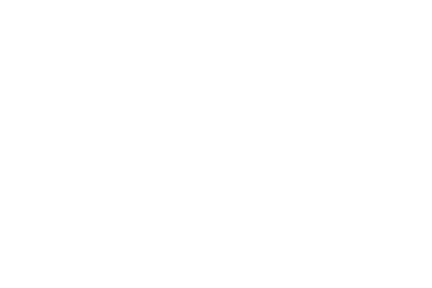

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(hist, bins=5)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [19]:
ll[7]

0.0007670511764399999

In [20]:
ll

[0.008889454085500001,
 0.00048026355586,
 0.0037009789866,
 0.00047865255276000003,
 0.00170705930008,
 0.0004271219188,
 0.00140086768523,
 0.0007670511764399999,
 0.0056333412306,
 0.00245371698204,
 0.0017858657318,
 0.00291347655,
 0.00039544805394000005,
 0.0119658199298,
 0.0008853855771800001,
 0.00052158404812,
 0.0045653985918,
 0.00032275293924,
 0.00053554692364,
 0.00119683328976,
 0.0124253072502,
 0.0063509456692,
 0.00067587883037,
 0.00151086823128,
 0.005310476374,
 0.0048472672779999995,
 0.00336258550168,
 0.01015214752,
 0.00086872552704,
 0.010346664042099999,
 0.00041608454844,
 0.00215675700999,
 0.0062007641958000004,
 0.00130994959667,
 0.00155875059616,
 0.0004896906353,
 0.00053999981409,
 0.0011513607799,
 0.00052929932913,
 0.0015071182056,
 0.0177243089908,
 0.007271204587299999,
 0.0061680422856,
 0.017652982169699998,
 0.000299331373221,
 0.00112890567858,
 0.00044791975409999997,
 0.00247330509921,
 0.007538309354,
 0.04345818664,
 0.000761132843599999

In [21]:
x[10]

0.0

In [22]:
len(X)

82

In [23]:
N = 3

In [24]:
from numpy.random import RandomState

In [25]:
rng = RandomState(0)

pca = PCA(n_components=3, whiten=True, svd_solver = 'randomized')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [26]:
pca.noise_variance_

4.777226856022459e-05

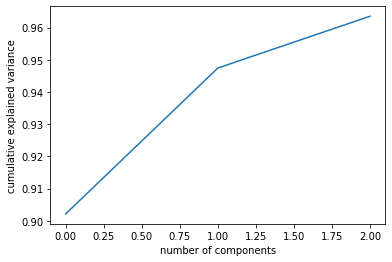

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [28]:
range(N)

range(0, 3)

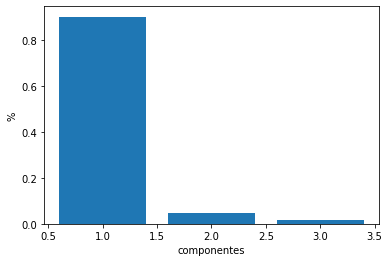

In [29]:
%matplotlib inline
plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.xlabel("componentes")
plt.ylabel("%")
plt.show()

## Soma das variancias relativas

### primeira

In [30]:
pca.explained_variance_ratio_[0]

0.9021374523873014

### primeira e segunda

In [31]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.9474331059323828

### primeira, segunda e terceira

In [32]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.963503496935916

In [33]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [34]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [35]:
pca.components_[0]

array([7.86626228e-05, 1.15214645e-04, 1.53671214e-04, ...,
       2.06230940e-04, 1.95493064e-04, 1.85656968e-04])

In [36]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [37]:
#if max(xtemp) < 0.02:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000,601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

<IPython.core.display.Javascript object>


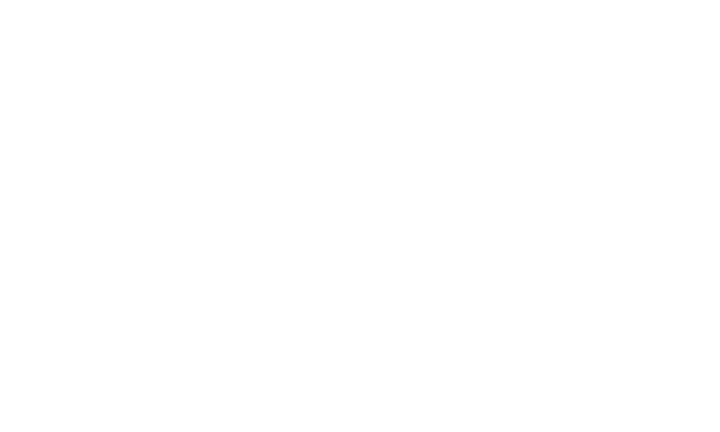

<IPython.core.display.Javascript object>


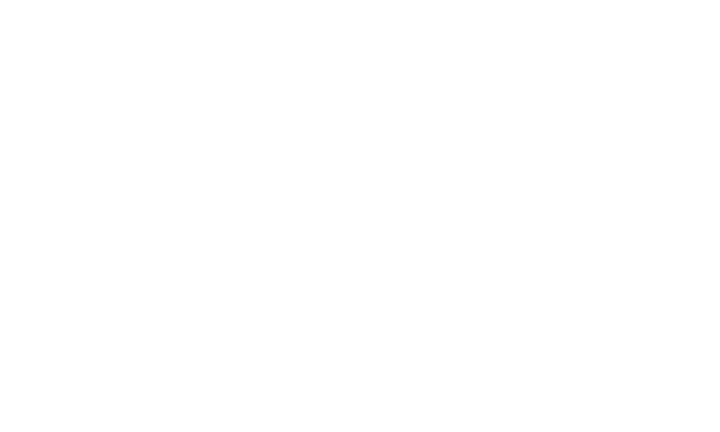

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

# Componentes

In [39]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

<IPython.core.display.Javascript object>


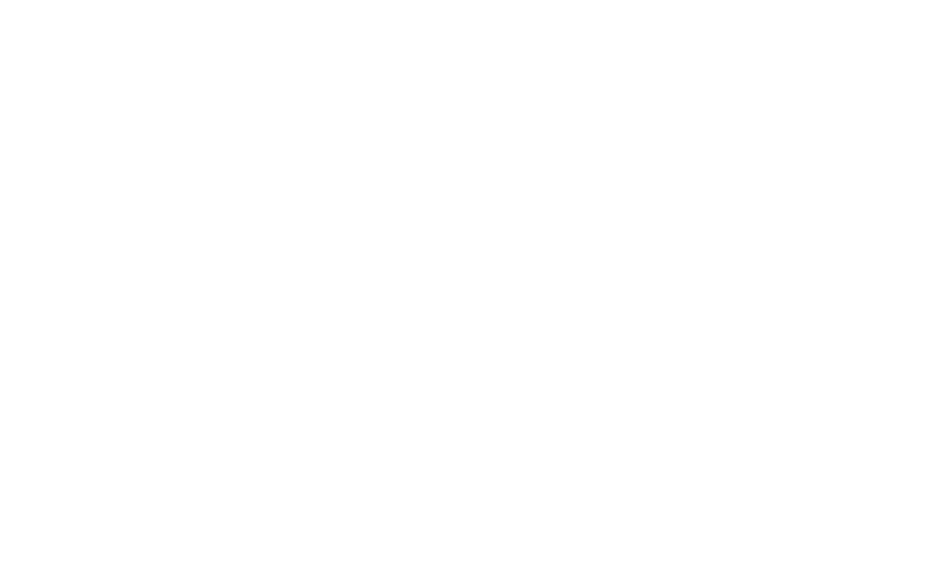

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2), value=0), Output()), _dom_classes=…

<IPython.core.display.Javascript object>


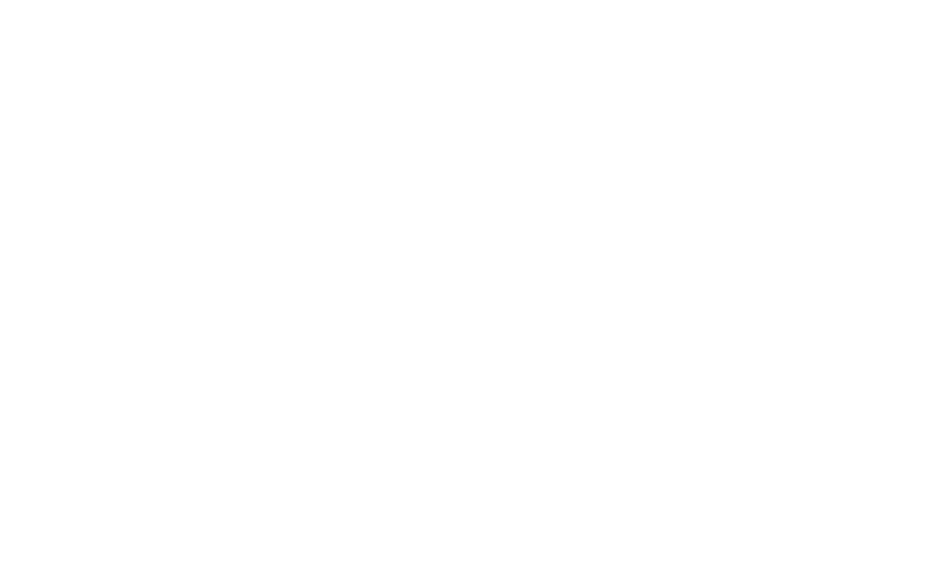

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

# Superficies com N componentes

In [41]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

<IPython.core.display.Javascript object>


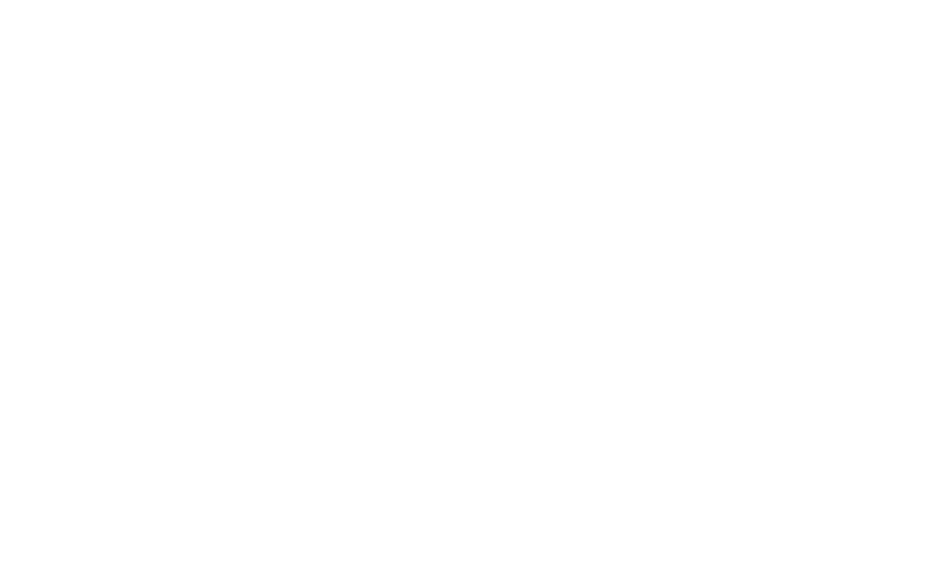

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [42]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


# Superficies originais

In [43]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

<IPython.core.display.Javascript object>


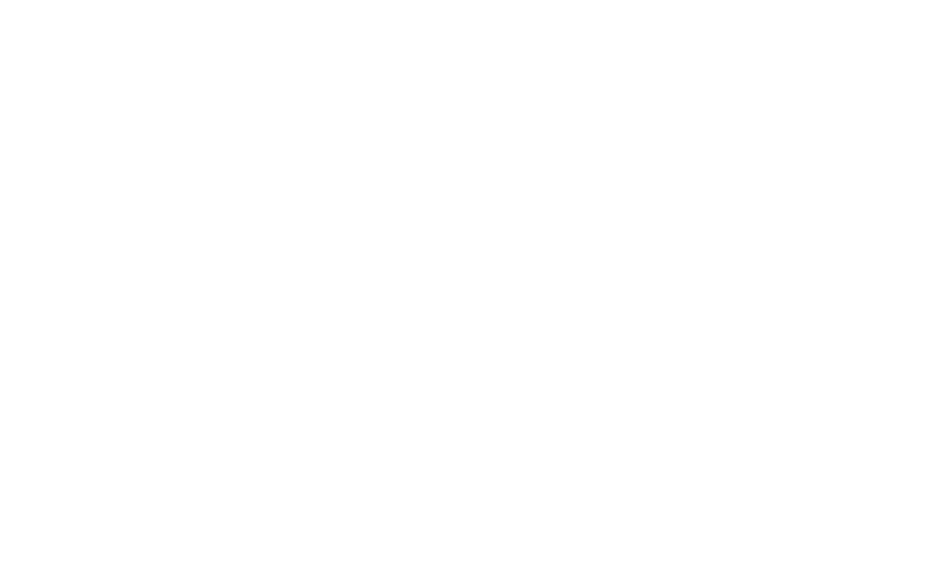

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [44]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

In [45]:
new_names[0]

'SN2000cx.dat'

In [46]:
len(pca.components_[0])

36661

In [47]:
Z = interp.griddata((xx,yy),pca.components_[0],(B1,B2),method='cubic')

In [48]:
len(Z)

601

In [49]:
teste = Z.transpose()

In [50]:
len(teste)

61

In [51]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [52]:
#exp_z = exp_z/max(exp_z)

In [53]:
save_path = '/home/joao/Documentos'

In [54]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [55]:
Z = interp.griddata((xx,yy),pca.components_[1],(B1,B2),method='cubic')

In [56]:
teste = Z.transpose()

In [57]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [58]:
#exp_z = exp_z/max(exp_z)

In [59]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [60]:
Z = interp.griddata((xx,yy),pca.components_[2],(B1,B2),method='cubic')

In [61]:
teste = Z.transpose()

In [62]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [63]:
#exp_z = exp_z/max(exp_z)

In [64]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [65]:
'''
arrays = [np.array(u) for u in X]

from scipy.stats import skew


med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

teste = Z.transpose()

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2mod.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\narrays = [np.array(u) for u in X]\n\nfrom scipy.stats import skew\n\n\nmed = [np.mean(k) for k in zip(*arrays)]\nvar = [np.var(k) for k in zip(*arrays)]\nskewness = [skew(k) for k in zip(*arrays)]\n\n%matplotlib notebook\n\nZ = interp.griddata((xx,yy),med,(B1,B2),method=\'cubic\')\n#Z = splinemean(B1, B2)\nfig = plt.figure(figsize=(10,6))\nax = axes3d.Axes3D(fig)\nax.plot_wireframe(B1, B2, Z)\nax.plot_surface(B1, B2, Z,alpha=0.4)\n#ax.scatter3D(xx,yy,pca.components_[0], c=\'r\')\n#ax3.set_xlim(3500, 7500)\n#ax3.set_ylim(-10, 50)\n#ax.set_zlim(0, max(pca.components_[1]))\n\nplt.show()\n\nZ = interp.griddata((xx,yy),skewness,(B1,B2),method=\'cubic\')\n\nteste = Z.transpose()\n\nexp_x = []\nexp_y = []\nexp_z = []\n\nfor i in range(0,len(x)):\n    \n    for j in range(0,len(y)):\n        \n        exp_x.append(x[i])\n        exp_y.append(y[j])\n        exp_z.append(teste[i][j])\n\ntable = []\nfor l in range(0,len(exp_x)):\n    table.append((exp_x[l],exp_y[l],exp_z[l]))\n\n\ncompleteName

In [66]:
density = []

In [67]:
for i in range(0,len(X[0])):
    
    count = 0
    
    for j in range(0,len(X)):
        
        if X[j][i] != 0:
            
            count += 1

    density.append(count)

In [68]:
zd = np.reshape(density, (601, 61))

In [69]:
zzd = []
xxd = []
yyd = []

for i in range(0,len(x)):

    for j in range(0,len(y)):

        zzd.append(zd[j][i])
        xxd.append(y[j])
        yyd.append(x[i])


<IPython.core.display.Javascript object>


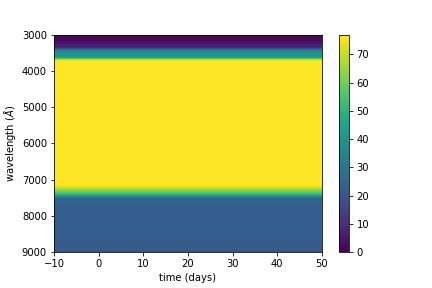

In [70]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook
z = np.reshape(zzd, (61, 601)).T
plt.imshow(z, extent=(np.amin(yyd), np.amax(yyd), np.amax(xxd), np.amin(xxd)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,77)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()

In [71]:
med = []
var = []
sky = []

In [72]:
from scipy.stats import skew

In [73]:
for i in range(0,len(X[0])):
    
    templist = []
    count = 0
    for j in range(0,len(X)):
        
        if X[j][i] > 0:
            
            templist.append(X[j][i])
            count += 1
    
    if count > 0:
        
        variance = np.var(templist)
        med.append(np.mean(templist))
        var.append(np.sqrt(variance))
        sky.append(skew(templist)*np.sqrt(variance)**3)
        
    else:
        
        med.append(0)
        var.append(0)
        sky.append(0)

In [74]:
Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')

In [75]:
teste = Z.transpose()

In [76]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [77]:
exp_z = exp_z/max(exp_z)

In [78]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "med.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [79]:
Z = interp.griddata((xx,yy),var,(B1,B2),method='cubic')

In [80]:
teste = Z.transpose()

In [81]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [82]:
exp_z = exp_z/max(exp_z)

In [83]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "var.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [84]:
Z = interp.griddata((xx,yy),sky,(B1,B2),method='cubic')

In [85]:
teste = Z.transpose()

In [86]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [87]:
exp_z = exp_z/max(exp_z)

In [88]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "sky.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
